In [26]:

%pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import mplfinance as mpf
import yfinance as yf   
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np


# Siemens India Stock Analysis

Now let's apply the same comprehensive analysis to **Siemens Ltd India** using the NSE ticker `SIEMENS.NS`.

We'll calculate:
- Moving Averages (20, 50, 200-day)
- RSI (Relative Strength Index)
- MACD (Moving Average Convergence Divergence)
- Trading Signals
- Technical Analysis

In [28]:
# Download Siemens India Stock Data
print("Downloading Siemens India Stock Data")

# Define Siemens India ticker
siemens_ticker = "SIEMENS.NS"  # NSE listing
siemens_start_date = "2024-01-01"
siemens_end_date = "2025-07-14"

# Download the data
try:
    siemens_data = yf.download(siemens_ticker, start=siemens_start_date, end=siemens_end_date)
    
    print(f"Siemens India ({siemens_ticker}) data downloaded successfully!")
    print(f"Data shape: {siemens_data.shape}")
    print(f"Date range: {siemens_data.index.min()} to {siemens_data.index.max()}")
    print()
    
    # Get company information
    siemens_info = yf.Ticker(siemens_ticker)
    info = siemens_info.info
    
    print("=== Siemens India Company Information ===")
    print(f"Company Name: {info.get('longName', 'Siemens Limited')}")
    print(f"Current Price: ₹{info.get('currentPrice', 'N/A')}")
    print(f"Market Cap: ₹{info.get('marketCap', 'N/A'):,}" if info.get('marketCap') else "Market Cap: N/A")
    print(f"52 Week High: ₹{info.get('fiftyTwoWeekHigh', 'N/A')}")
    print(f"52 Week Low: ₹{info.get('fiftyTwoWeekLow', 'N/A')}")
    print()
    
    # Display first few rows
    print("First 5 rows of Siemens India data:")
    print(siemens_data.head())
    
except Exception as e:
    print(f"Error downloading Siemens India data: {e}")
    print("This might be due to market hours, network issues, or ticker symbol problems.")

C:\Users\z0052dbf\AppData\Local\Temp\ipykernel_16464\128764841.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  siemens_data = yf.download(siemens_ticker, start=siemens_start_date, end=siemens_end_date)
[*********************100%***********************]  1 of 1 completed

Siemens India (SIEMENS.NS) data downloaded successfully!
Data shape: (378, 5)
Date range: 2024-01-01 00:00:00 to 2025-07-11 00:00:00



=== Siemens India Company Information ===
Company Name: Siemens Limited
Current Price: ₹3146.8
Market Cap: ₹1,165,996,457,984
52 Week High: ₹8129.9
52 Week Low: ₹2450.0

First 5 rows of Siemens India data:
Price             Close         High          Low         Open     Volume
Ticker       SIEMENS.NS   SIEMENS.NS   SIEMENS.NS   SIEMENS.NS SIEMENS.NS
Date                                                                     
2024-01-01  4007.926025  4040.233909  3991.448433  4011.360873     127992
2024-01-02  4023.906006  4031.273511  3949.333772  4027.340853     210466
2024-01-03  4067.265137  4092.006441  4036.400855  4037.247230     347303
2024-01-04  4070.749756  4109.031616  4058.702876  4084.041407     221232
2024-01-05  4059.350098  4096.536435  4039.238581  4081.203953     140037


In [29]:
# Data Exploration and Cleaning for Siemens India
print(" Siemens India Data Exploration")

# Check for missing values
print("Missing values check:")
print(siemens_data.isnull().sum())
print()

# Handle missing values if any
siemens_data.fillna(method='ffill', inplace=True)  # Forward fill to handle missing values
siemens_data.fillna(method='bfill', inplace=True)  # Backward fill to handle any remaining missing values

# Verify no missing values
print("After handling missing values:")
print(siemens_data.isnull().sum())
print()

# Data types
print("Data types:")
print(siemens_data.dtypes)
print()

# Basic statistics
print("Basic Statistics for Siemens India:")
print(siemens_data.describe())
print()

# Calculate daily returns
siemens_data['Daily Return'] = siemens_data['Close'].pct_change()

print("Daily returns calculated!")
print("Recent daily returns:")
print(siemens_data[['Close', 'Daily Return']].tail())

 Siemens India Data Exploration
Missing values check:
Price   Ticker    
Close   SIEMENS.NS    0
High    SIEMENS.NS    0
Low     SIEMENS.NS    0
Open    SIEMENS.NS    0
Volume  SIEMENS.NS    0
dtype: int64

After handling missing values:
Price   Ticker    
Close   SIEMENS.NS    0
High    SIEMENS.NS    0
Low     SIEMENS.NS    0
Open    SIEMENS.NS    0
Volume  SIEMENS.NS    0
dtype: int64

Data types:
Price   Ticker    
Close   SIEMENS.NS    float64
High    SIEMENS.NS    float64
Low     SIEMENS.NS    float64
Open    SIEMENS.NS    float64
Volume  SIEMENS.NS      int64
dtype: object

Basic Statistics for Siemens India:
Price         Close         High          Low         Open        Volume
Ticker   SIEMENS.NS   SIEMENS.NS   SIEMENS.NS   SIEMENS.NS    SIEMENS.NS
count    378.000000   378.000000   378.000000   378.000000  3.780000e+02
mean    5615.199092  5708.078279  5531.243264  5628.559141  4.639019e+05
std     1575.250181  1598.521239  1554.682011  1584.584450  3.851080e+05
min     2715

C:\Users\z0052dbf\AppData\Local\Temp\ipykernel_16464\3096980226.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  siemens_data.fillna(method='ffill', inplace=True)  # Forward fill to handle missing values
C:\Users\z0052dbf\AppData\Local\Temp\ipykernel_16464\3096980226.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  siemens_data.fillna(method='bfill', inplace=True)  # Backward fill to handle any remaining missing values


In [30]:
# Calculate Moving Averages for Siemens India
print("=== Calculating Moving Averages for Siemens India ===")

# Calculate 20, 50, and 200-day moving averages
siemens_data['MA20'] = siemens_data['Close'].rolling(window=20).mean()
siemens_data['MA50'] = siemens_data['Close'].rolling(window=50).mean()  
siemens_data['MA200'] = siemens_data['Close'].rolling(window=200).mean()

print("Moving averages calculated successfully!")
print()

# Show when moving averages become valid
print("Moving Average validation:")
print(f"Total data points: {len(siemens_data)}")
print(f"MA20 valid from day 20: {siemens_data['MA20'].dropna().head(1).index[0] if not siemens_data['MA20'].dropna().empty else 'No valid data'}")
print(f"MA50 valid from day 50: {siemens_data['MA50'].dropna().head(1).index[0] if not siemens_data['MA50'].dropna().empty else 'No valid data'}")
print(f"MA200 valid from day 200: {siemens_data['MA200'].dropna().head(1).index[0] if not siemens_data['MA200'].dropna().empty else 'No valid data'}")
print()

# Display recent data with moving averages
print("Recent data with moving averages:")
print(siemens_data[['Close', 'MA20', 'MA50', 'MA200']].tail(10))

=== Calculating Moving Averages for Siemens India ===
Moving averages calculated successfully!

Moving Average validation:
Total data points: 378
MA20 valid from day 20: 2024-01-30 00:00:00
MA50 valid from day 50: 2024-03-13 00:00:00
MA200 valid from day 200: 2024-10-23 00:00:00

Recent data with moving averages:
Price             Close         MA20         MA50        MA200
Ticker       SIEMENS.NS                                       
Date                                                          
2025-06-30  3251.500000  3263.845007  3131.622007  5442.403867
2025-07-01  3323.100098  3264.300012  3141.544009  5426.172681
2025-07-02  3287.699951  3263.220007  3150.168008  5409.715592
2025-07-03  3311.699951  3264.780005  3158.962007  5393.070640
2025-07-04  3292.399902  3264.525000  3166.740005  5376.050513
2025-07-07  3278.199951  3259.269995  3175.634004  5358.946664
2025-07-08  3296.800049  3255.525000  3183.240005  5341.680840
2025-07-09  3218.300049  3248.945007  3189.006006  5324

In [31]:


# Define RSI calculation function
def calculate_rsi(series, period=14):
	delta = series.diff()
	gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
	loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
	rs = gain / loss
	rsi = 100 - (100 / (1 + rs))
	return rsi

# Define MACD calculation function
def calculate_macd(series, fast=12, slow=26, signal=9):
	exp1 = series.ewm(span=fast, adjust=False).mean()
	exp2 = series.ewm(span=slow, adjust=False).mean()
	macd = exp1 - exp2
	macd_signal = macd.ewm(span=signal, adjust=False).mean()
	macd_histogram = macd - macd_signal
	return macd, macd_signal, macd_histogram



In [32]:
# Calculate RSI and MACD for Siemens India
print("Calculating RSI and MACD for Siemens India......")

# Calculate RSI using our function
siemens_data['RSI'] = calculate_rsi(siemens_data['Close'])

# Calculate MACD using our function
siemens_data['MACD'], siemens_data['MACD_Signal'], siemens_data['MACD_Histogram'] = calculate_macd(siemens_data['Close'])

print("RSI and MACD calculated successfully for Siemens India!")
print()

# Show recent RSI and MACD values
print("Recent RSI and MACD values:")
print(siemens_data[['Close', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Histogram']].tail(10))
print()

# RSI Analysis
print("Siemens India RSI Analysis\n")
siemens_rsi_stats = siemens_data['RSI'].describe()
print("RSI Statistics:")
print(siemens_rsi_stats)
print()

# Count RSI signals
siemens_rsi_overbought = (siemens_data['RSI'] > 70).sum()
siemens_rsi_oversold = (siemens_data['RSI'] < 30).sum()
siemens_rsi_neutral = ((siemens_data['RSI'] >= 30) & (siemens_data['RSI'] <= 70)).sum()

print(f"RSI Signals for Siemens India:")
print(f"Overbought (>70): {siemens_rsi_overbought} days")
print(f"Oversold (<30): {siemens_rsi_oversold} days")
print(f"Neutral (30-70): {siemens_rsi_neutral} days")
print()

# MACD Analysis
print("=== Siemens India MACD Analysis ===")
print("MACD Statistics:")
print(siemens_data[['MACD', 'MACD_Signal', 'MACD_Histogram']].describe())

Calculating RSI and MACD for Siemens India......
RSI and MACD calculated successfully for Siemens India!

Recent RSI and MACD values:
Price             Close        RSI       MACD MACD_Signal MACD_Histogram
Ticker       SIEMENS.NS                                                 
Date                                                                    
2025-06-30  3251.500000  40.796325 -23.994411  -16.415021      -7.579390
2025-07-01  3323.100098  48.093354 -13.865712  -15.905159       2.039447
2025-07-02  3287.699951  51.540100  -8.596051  -14.443338       5.847286
2025-07-03  3311.699951  53.845006  -2.454909  -12.045652       9.590743
2025-07-04  3292.399902  51.536531   0.844898   -9.467542      10.312440
2025-07-07  3278.199951  46.631469   2.287829   -7.116468       9.404297
2025-07-08  3296.800049  45.307032   4.876027   -4.717969       9.593996
2025-07-09  3218.300049  44.772835   0.586142   -3.657147       4.243288
2025-07-10  3191.600098  48.091873  -4.911470   -3.908011      

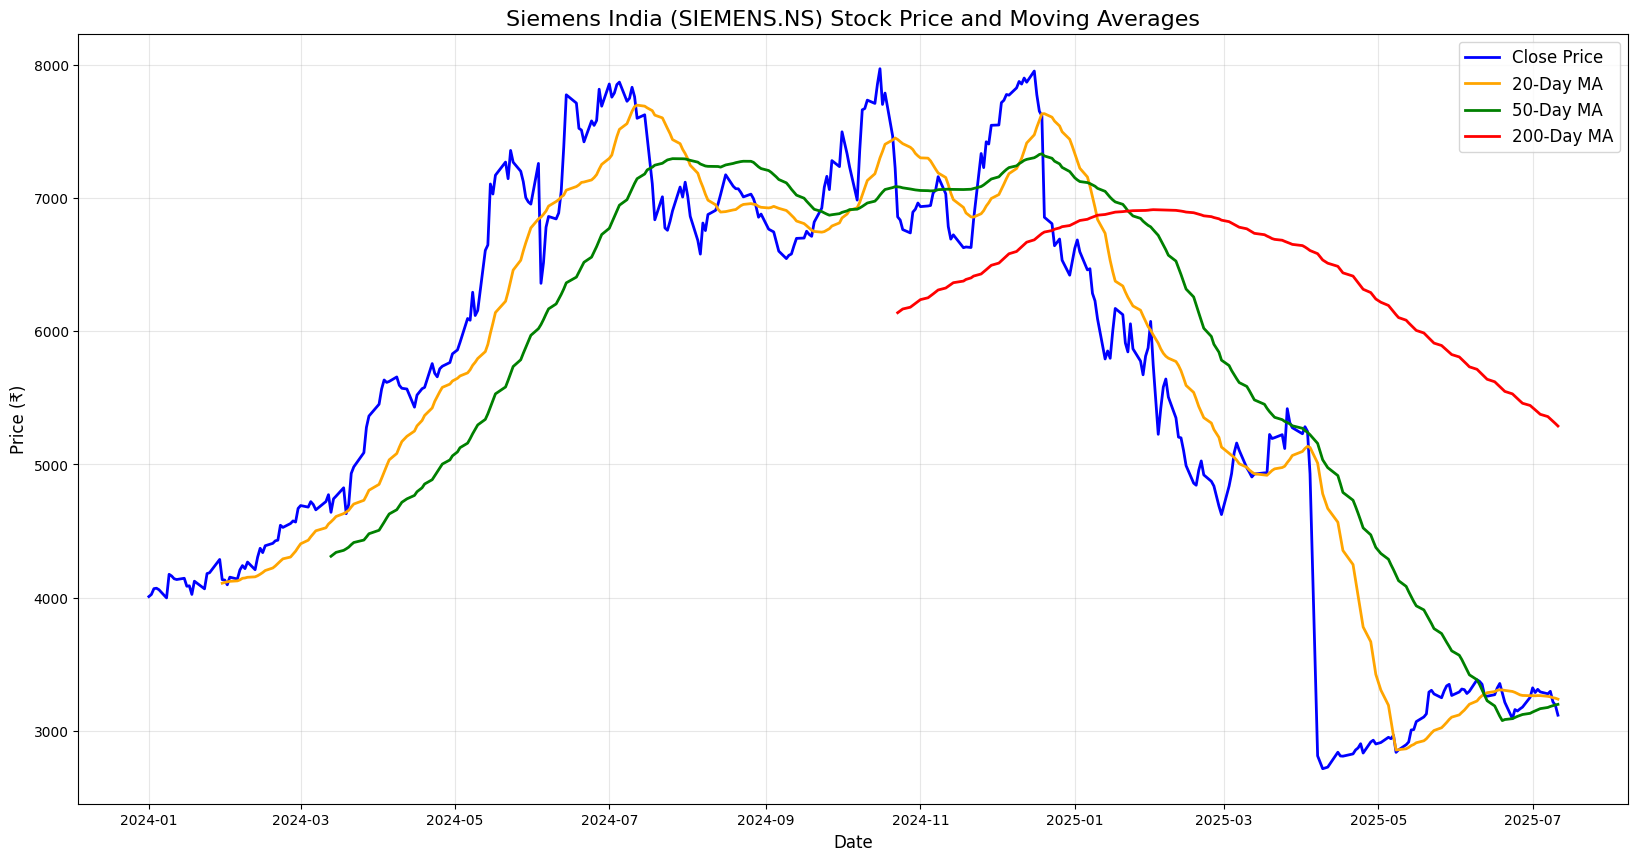

In [33]:
# Visualize Siemens India Stock Price and Moving Averages
plt.figure(figsize=(20, 10))
plt.plot(siemens_data.index, siemens_data['Close'], label='Close Price', color='blue', linewidth=2)      
plt.plot(siemens_data.index, siemens_data['MA20'], label='20-Day MA', color='orange', linewidth=2)
plt.plot(siemens_data.index, siemens_data['MA50'], label='50-Day MA', color='green', linewidth=2)            
plt.plot(siemens_data.index, siemens_data['MA200'], label='200-Day MA', color='red', linewidth=2)
plt.title(f"Siemens India ({siemens_ticker}) Stock Price and Moving Averages", fontsize=16)    
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (₹)", fontsize=12) 
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()



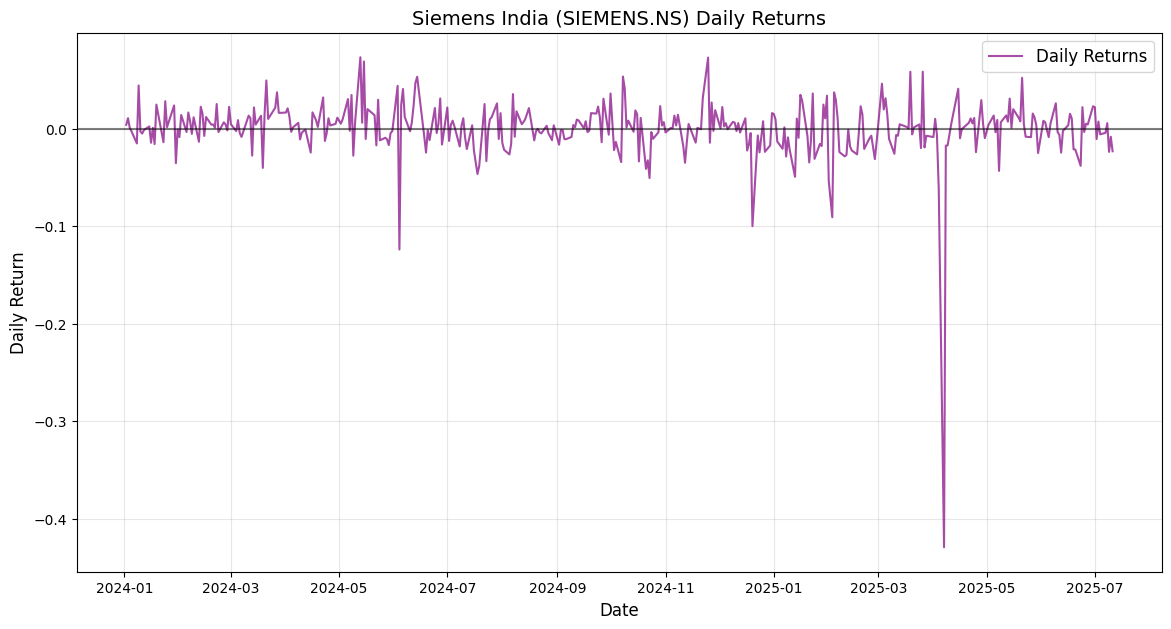

In [34]:
# Plot daily returns
plt.figure(figsize=(14, 7))
plt.plot(siemens_data.index, siemens_data['Daily Return'], label='Daily Returns', color='purple', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Daily Return", fontsize=12)
plt.title(f"Siemens India ({siemens_ticker}) Daily Returns", fontsize=14)   
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()



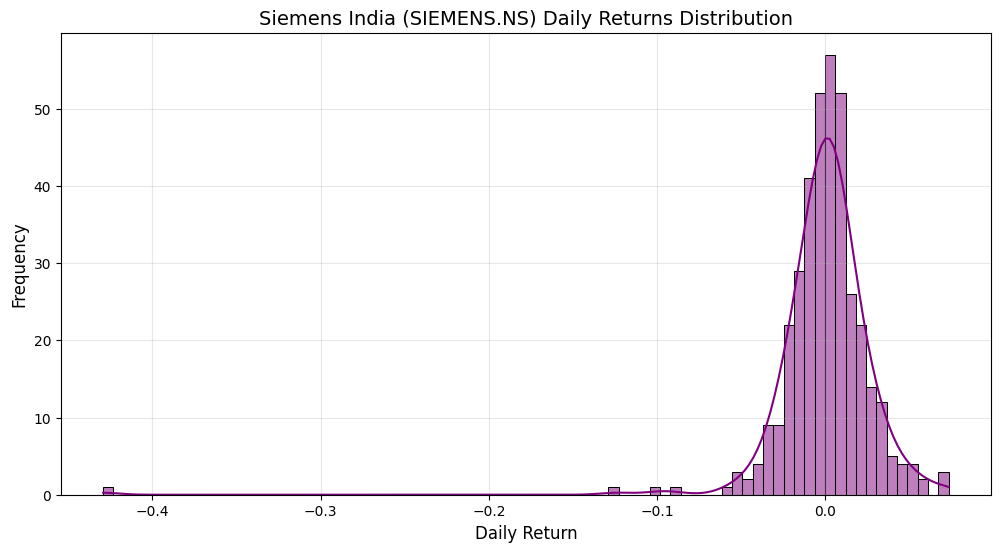

In [35]:
# Plot distribution of daily returns
plt.figure(figsize=(12, 6))
sns.histplot(siemens_data['Daily Return'].dropna(), kde=True, color='purple')
plt.title(f"Siemens India ({siemens_ticker}) Daily Returns Distribution", fontsize=14)
plt.xlabel("Daily Return", fontsize=12)      
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

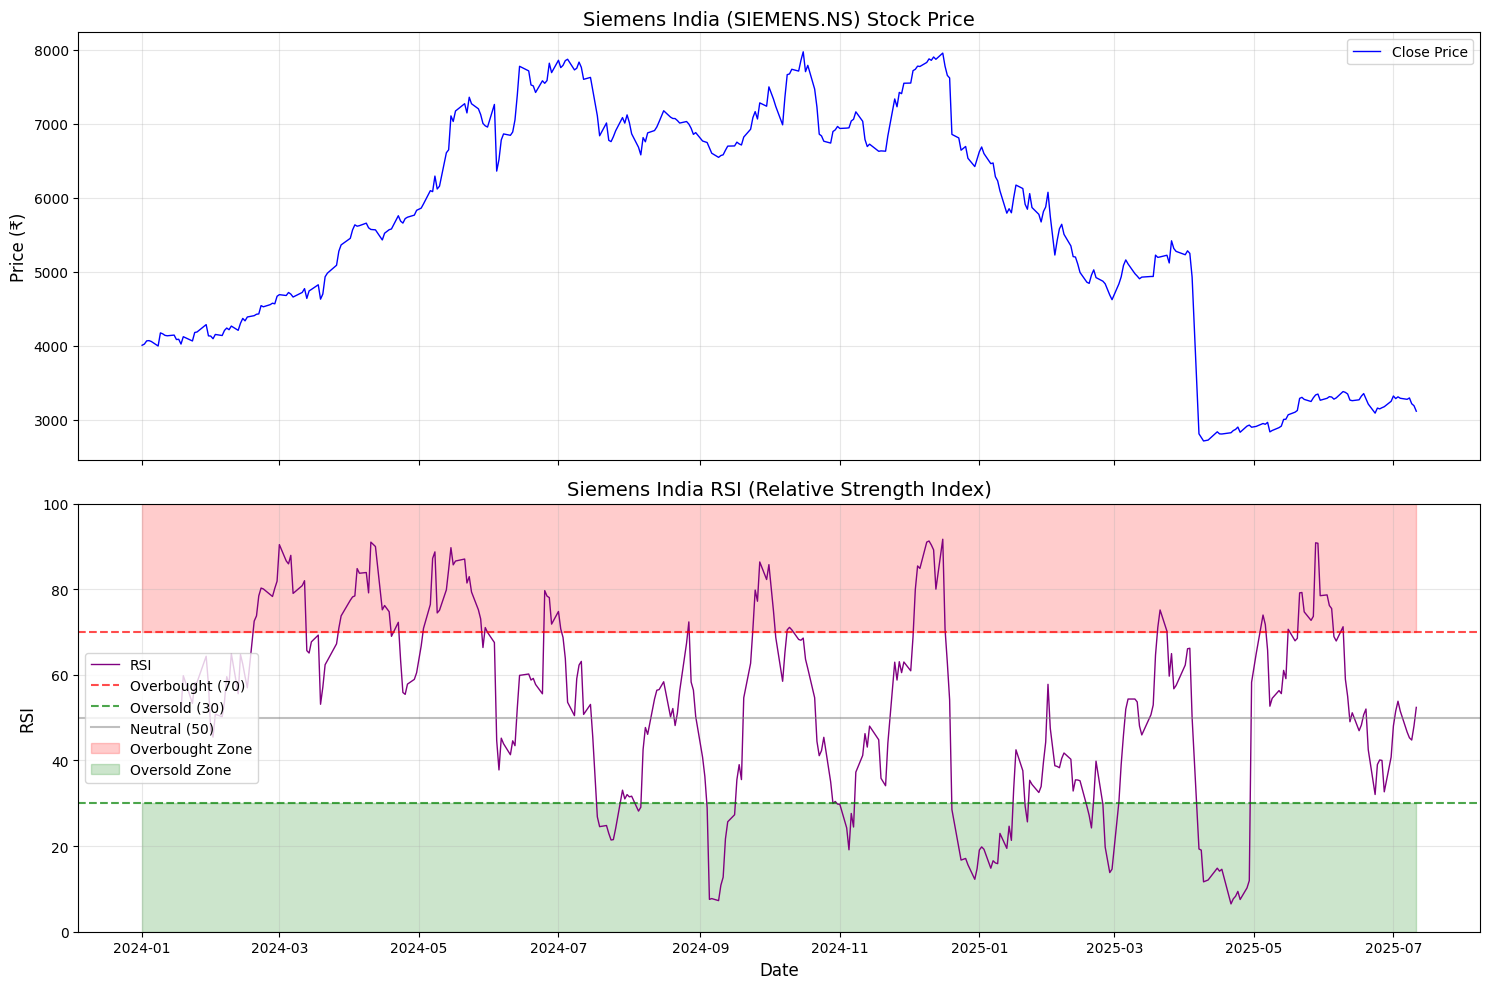

In [39]:
# Visualize RSI for Siemens India
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot stock price
ax1.plot(siemens_data.index, siemens_data['Close'], label='Close Price', color='blue', linewidth=1)
ax1.set_title(f'Siemens India ({siemens_ticker}) Stock Price', fontsize=14)
ax1.set_ylabel('Price (₹)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot RSI
ax2.plot(siemens_data.index, siemens_data['RSI'], label='RSI', color='purple', linewidth=1)
ax2.axhline(y=70, color='red', linestyle='--', alpha=0.7, label='Overbought (70)')
ax2.axhline(y=30, color='green', linestyle='--', alpha=0.7, label='Oversold (30)')
ax2.axhline(y=50, color='gray', linestyle='-', alpha=0.5, label='Neutral (50)')
ax2.fill_between(siemens_data.index, 70, 100, alpha=0.2, color='red', label='Overbought Zone')
ax2.fill_between(siemens_data.index, 0, 30, alpha=0.2, color='green', label='Oversold Zone')
ax2.set_title('Siemens India RSI (Relative Strength Index)', fontsize=14)
ax2.set_ylabel('RSI', fontsize=12)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylim(0, 100)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

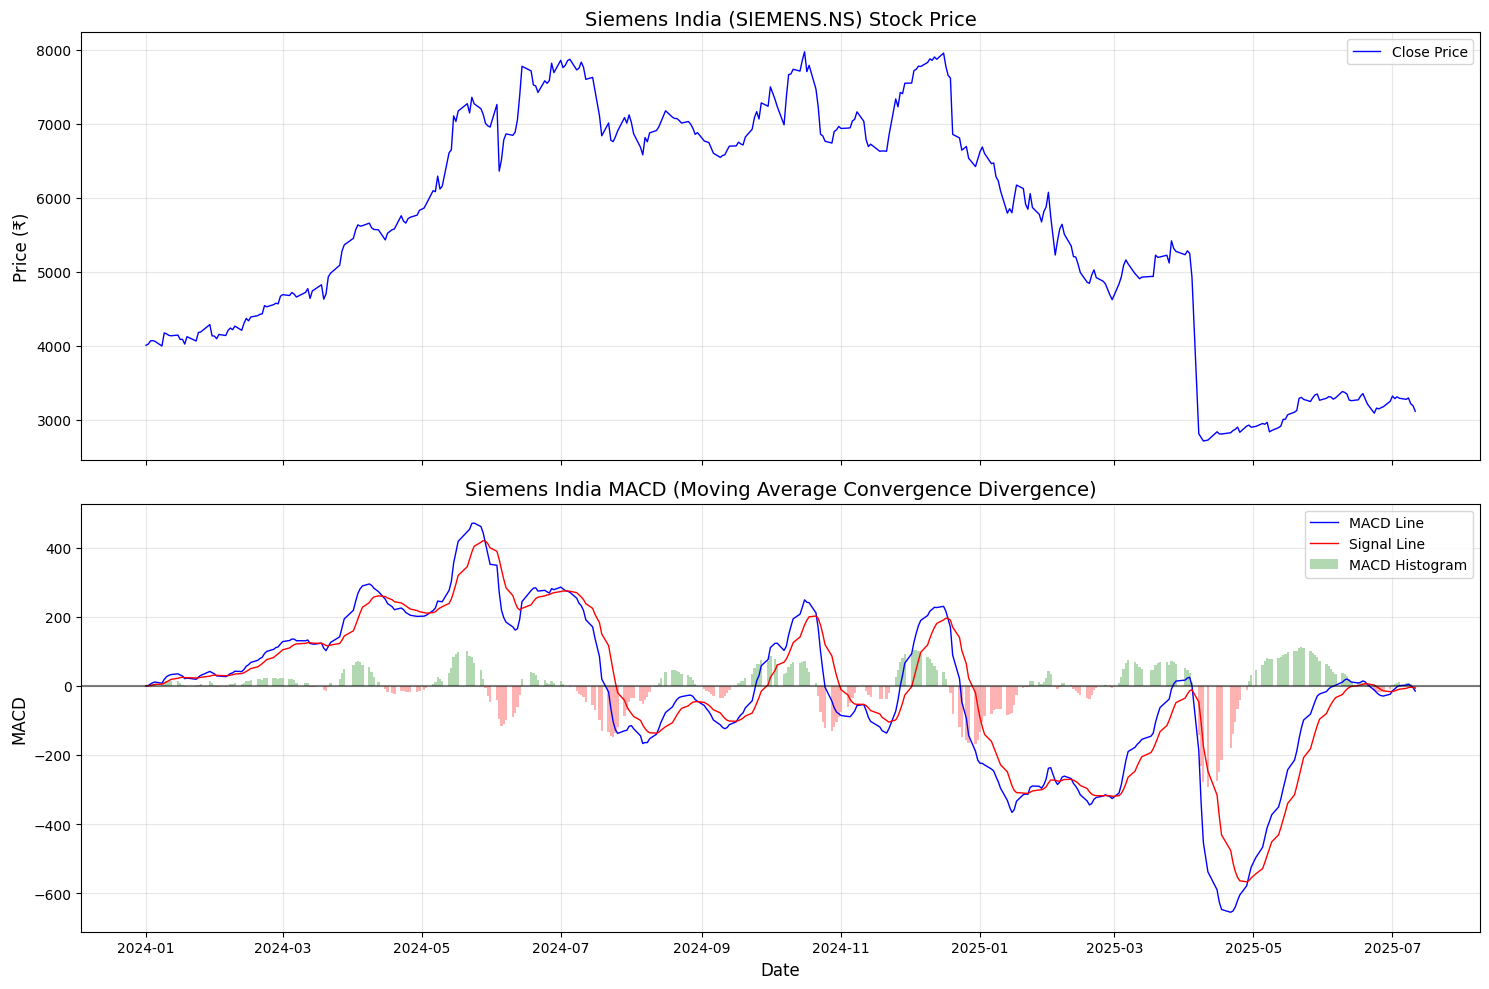

In [37]:
# Visualize MACD for Siemens India
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot stock price
ax1.plot(siemens_data.index, siemens_data['Close'], label='Close Price', color='blue', linewidth=1)
ax1.set_title(f'Siemens India ({siemens_ticker}) Stock Price', fontsize=14)
ax1.set_ylabel('Price (₹)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot MACD
ax2.plot(siemens_data.index, siemens_data['MACD'], label='MACD Line', color='blue', linewidth=1)
ax2.plot(siemens_data.index, siemens_data['MACD_Signal'], label='Signal Line', color='red', linewidth=1)

# Plot histogram
colors = ['green' if x >= 0 else 'red' for x in siemens_data['MACD_Histogram']]
ax2.bar(siemens_data.index, siemens_data['MACD_Histogram'], label='MACD Histogram', 
        color=colors, alpha=0.3, width=1)

ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax2.set_title('Siemens India MACD (Moving Average Convergence Divergence)', fontsize=14)
ax2.set_ylabel('MACD', fontsize=12)
ax2.set_xlabel('Date', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Define the generate_signals function
def generate_signals(df):
    signals = pd.DataFrame(index=df.index)
    signals['Price'] = df['Close']
    signals['RSI'] = df['RSI']
    signals['MACD'] = df['MACD']
    signals['MACD_Signal'] = df['MACD_Signal']

    # RSI signals
    signals['RSI_Signal'] = 0
    signals.loc[signals['RSI'] < 30, 'RSI_Signal'] = 1   # Buy
    signals.loc[signals['RSI'] > 70, 'RSI_Signal'] = -1  # Sell

    # MACD signals (cross above/below signal line)
    signals['MACD_Signal_Flag'] = 0
    signals['MACD_Signal_Flag'] = np.where(signals['MACD'] > signals['MACD_Signal'], 1, -1)

    # Combined signal: Buy if both are buy, Sell if both are sell
    signals['Combined_Signal'] = 0
    signals.loc[(signals['RSI_Signal'] == 1) & (signals['MACD_Signal_Flag'] == 1), 'Combined_Signal'] = 1
    signals.loc[(signals['RSI_Signal'] == -1) & (signals['MACD_Signal_Flag'] == -1), 'Combined_Signal'] = -1

    return signals

# Generate Trading Signals for Siemens India
print("=== Generating Trading Signals for Siemens India ===")

# Generate signals using our function
siemens_signals = generate_signals(siemens_data)

# Display signal summary
print("Trading Signals Summary for Siemens India:")
print(f"RSI Buy Signals (Oversold): {(siemens_signals['RSI_Signal'] == 1).sum()}")
print(f"RSI Sell Signals (Overbought): {(siemens_signals['RSI_Signal'] == -1).sum()}")
print(f"MACD Buy Signals: {(siemens_signals['MACD_Signal_Flag'] == 1).sum()}")
print(f"MACD Sell Signals: {(siemens_signals['MACD_Signal_Flag'] == -1).sum()}")
print(f"Combined Buy Signals: {(siemens_signals['Combined_Signal'] == 1).sum()}")
print(f"Combined Sell Signals: {(siemens_signals['Combined_Signal'] == -1).sum()}")
print()

# Show recent signals
print("Recent Trading Signals:")
recent_siemens_signals = siemens_signals[['Price', 'RSI', 'RSI_Signal', 'MACD_Signal_Flag', 'Combined_Signal']].tail(10)
print(recent_siemens_signals)
print()

# Current status
current_price = siemens_data['Close'].iloc[-1]
current_rsi = siemens_data['RSI'].iloc[-1]
current_macd = siemens_data['MACD'].iloc[-1]

print("=== Current Status for Siemens India ===")
# Extract scalar value from Series if necessary
if isinstance(current_price, pd.Series):
    current_price_value = current_price.values[0]
else:
    current_price_value = current_price
print(f"Current Price: ₹{current_price_value:.2f}")
print(f"Current RSI: {current_rsi:.2f}")
print(f"Current MACD: {current_macd:.4f}")
if current_rsi > 70:
    print("RSI Signal: OVERBOUGHT - Consider selling")
elif current_rsi < 30:
    print("RSI Signal: OVERSOLD - Consider buying")
else:
    print(" RSI Signal: NEUTRAL - Wait and watch")

if current_macd > 0:
    print(" MACD Signal: POSITIVE - Bullish momentum")
else:
    print(" MACD Signal: NEGATIVE - Bearish momentum")

=== Generating Trading Signals for Siemens India ===
Trading Signals Summary for Siemens India:
RSI Buy Signals (Oversold): 66
RSI Sell Signals (Overbought): 94
MACD Buy Signals: 218
MACD Sell Signals: 160
Combined Buy Signals: 2
Combined Sell Signals: 6

Recent Trading Signals:
                  Price        RSI  RSI_Signal  MACD_Signal_Flag  \
Date                                                               
2025-06-30  3251.500000  40.796325           0                -1   
2025-07-01  3323.100098  48.093354           0                 1   
2025-07-02  3287.699951  51.540100           0                 1   
2025-07-03  3311.699951  53.845006           0                 1   
2025-07-04  3292.399902  51.536531           0                 1   
2025-07-07  3278.199951  46.631469           0                 1   
2025-07-08  3296.800049  45.307032           0                 1   
2025-07-09  3218.300049  44.772835           0                 1   
2025-07-10  3191.600098  48.091873      

TypeError: unsupported format string passed to Series.__format__

In [ ]:
# Visualize Trading Signals for Siemens India
plt.figure(figsize=(15, 8))

# Plot stock price
plt.plot(siemens_data.index, siemens_data['Close'], label='Close Price', color='blue', linewidth=2)

# Plot buy signals
siemens_buy_signals = siemens_signals[siemens_signals['Combined_Signal'] == 1]
plt.scatter(siemens_buy_signals.index, siemens_buy_signals['Price'], 
           color='green', marker='^', s=120, label='Buy Signal', zorder=5)

# Plot sell signals
siemens_sell_signals = siemens_signals[siemens_signals['Combined_Signal'] == -1]
plt.scatter(siemens_sell_signals.index, siemens_sell_signals['Price'], 
           color='red', marker='v', s=120, label='Sell Signal', zorder=5)

plt.title(f'Siemens India ({siemens_ticker}) - Combined RSI & MACD Trading Signals', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (₹)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Show specific buy/sell dates for Siemens India
if len(siemens_buy_signals) > 0:
    print("=== Siemens India Buy Signal Dates ===")
    for date, row in siemens_buy_signals.iterrows():
        print(f"Date: {date.strftime('%Y-%m-%d')}, Price: ₹{row['Price']:.2f}, RSI: {row['RSI']:.2f}")
else:
    print("No combined buy signals found for Siemens India in this period.")

print()

if len(siemens_sell_signals) > 0:
    print("=== Siemens India Sell Signal Dates ===")
    for date, row in siemens_sell_signals.iterrows():
        print(f"Date: {date.strftime('%Y-%m-%d')}, Price: ₹{row['Price']:.2f}, RSI: {row['RSI']:.2f}")
else:
    print("No combined sell signals found for Siemens India in this period.")

In [ ]:
# Comparison: Apple vs Siemens India
print("=== COMPARISON: APPLE (AAPL) vs SIEMENS INDIA (SIEMENS.NS) ===")
print()

# Performance comparison
try:
    # Calculate returns for both
    apple_total_return = ((data['Close'].iloc[-1] - data['Close'].iloc[0]) / data['Close'].iloc[0]) * 100
    siemens_total_return = ((siemens_data['Close'].iloc[-1] - siemens_data['Close'].iloc[0]) / siemens_data['Close'].iloc[0]) * 100
    
    # Volatility (standard deviation of daily returns)
    apple_volatility = data['Daily Return'].std() * 100
    siemens_volatility = siemens_data['Daily Return'].std() * 100
    
    # Average daily return
    apple_avg_return = data['Daily Return'].mean() * 100
    siemens_avg_return = siemens_data['Daily Return'].mean() * 100
    
    print("PERFORMANCE METRICS:")
    print("-" * 50)
    print(f"{'Metric':<25} {'Apple (AAPL)':<15} {'Siemens India':<15}")
    print("-" * 50)
    print(f"{'Total Return (%)':<25} {apple_total_return:<15.2f} {siemens_total_return:<15.2f}")
    print(f"{'Daily Volatility (%)':<25} {apple_volatility:<15.2f} {siemens_volatility:<15.2f}")
    print(f"{'Avg Daily Return (%)':<25} {apple_avg_return:<15.4f} {siemens_avg_return:<15.4f}")
    print(f"{'Current Price':<25} {'$' + str(data['Close'].iloc[-1]):<15.2f} {'₹' + str(siemens_data['Close'].iloc[-1]):<15.2f}")
    print()
    
    # RSI Comparison
    apple_current_rsi = data['RSI'].iloc[-1]
    siemens_current_rsi = siemens_data['RSI'].iloc[-1]
    
    print("TECHNICAL INDICATORS:")
    print("-" * 50)
    print(f"{'Current RSI':<25} {apple_current_rsi:<15.2f} {siemens_current_rsi:<15.2f}")
    print(f"{'Current MACD':<25} {data['MACD'].iloc[-1]:<15.4f} {siemens_data['MACD'].iloc[-1]:<15.4f}")
    print()
    
    # Trading signals comparison
    apple_buy_signals = (signals['Combined_Signal'] == 1).sum()
    apple_sell_signals = (signals['Combined_Signal'] == -1).sum()
    siemens_buy_signals = (siemens_signals['Combined_Signal'] == 1).sum()
    siemens_sell_signals = (siemens_signals['Combined_Signal'] == -1).sum()
    
    print("TRADING SIGNALS:")
    print("-" * 50)
    print(f"{'Buy Signals':<25} {apple_buy_signals:<15} {siemens_buy_signals:<15}")
    print(f"{'Sell Signals':<25} {apple_sell_signals:<15} {siemens_sell_signals:<15}")
    print()
    
    # Market analysis
    print("MARKET ANALYSIS:")
    print("-" * 50)
    if apple_total_return > siemens_total_return:
        print("📈 Apple has outperformed Siemens India in total returns")
    else:
        print("📈 Siemens India has outperformed Apple in total returns")
        
    if apple_volatility > siemens_volatility:
        print("⚡ Apple is more volatile than Siemens India")
    else:
        print("⚡ Siemens India is more volatile than Apple")

except Exception as e:
    print(f"Error in comparison: {e}")
    print("Unable to complete comparison - check if both datasets are available")